In [1]:
using BenchmarkTools

INFO: Precompiling module JLD.


In [2]:
function maxpy!(a::Float64, x::Array{Float64,1}, y::Array{Float64,1})
    n = size(y,1)
    for i=1:n
        y[i] += a * x[i]
    end
end

maxpy! (generic function with 1 method)

In [3]:
a=1.2;

In [4]:
@benchmark maxpy!(a,x,y) setup=(x=rand(1000000); y=copy(x))

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     1.113 ms (0.00% GC)
  median time:      1.254 ms (0.00% GC)
  mean time:        1.250 ms (0.00% GC)
  maximum time:     1.720 ms (0.00% GC)
  --------------
  samples:          1057
  evals/sample:     1

In [8]:
@benchmark y+=a*x setup=(x=rand(1000000); y=copy(x))

BenchmarkTools.Trial: 
  memory estimate:  15.26 MiB
  allocs estimate:  4
  --------------
  minimum time:     2.981 ms (0.00% GC)
  median time:      3.533 ms (11.97% GC)
  mean time:        3.652 ms (7.95% GC)
  maximum time:     4.640 ms (9.17% GC)
  --------------
  samples:          746
  evals/sample:     1

In [9]:
function blas_axpy!(a::Float64, x::Array{Float64,1}, y::Array{Float64,1})
    ccall( (:cblas_daxpy, "libopenblas"),
        Void, (Clonglong, Cdouble, Ptr{Cdouble}, Clonglong, Ptr{Cdouble}, Clonglong),
        size(y,1), a, x, 1, y, 1)
end    

blas_axpy! (generic function with 1 method)

In [10]:
@benchmark blas_axpy!(a,x,y) setup=(x=rand(1000000); y=copy(x))

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     947.480 μs (0.00% GC)
  median time:      1.030 ms (0.00% GC)
  mean time:        1.052 ms (0.00% GC)
  maximum time:     5.244 ms (0.00% GC)
  --------------
  samples:          1347
  evals/sample:     1

---

In [11]:
function measure_maxpy(n)
    t = @benchmark maxpy!(a,x,y) setup=(x=rand($n); y=copy(x))
    mflops = 2*n / median(t).time * 1.e3
end

measure_maxpy (generic function with 1 method)

In [12]:
measure_maxpy(1000)

3463.089395700311

In [13]:
sizes = round.(Int, logspace(1,7,15))

15-element Array{Int64,1}:
       10
       27
       72
      193
      518
     1389
     3728
    10000
    26827
    71969
   193070
   517947
  1389495
  3727594
 10000000

In [14]:
mflops = [measure_maxpy(n) for n in sizes]

15-element Array{Float64,1}:
  890.099
 1542.81 
 2152.04 
 2856.06 
 3341.26 
 3475.96 
 3455.58 
 3439.28 
 3342.1  
 3341.72 
 3244.41 
 2315.38 
 1549.86 
 1455.87 
 1301.3  

In [15]:
using PyPlot

INFO: Recompiling stale cache file /home/furst/.julia/lib/v0.6/LaTeXStrings.ji for module LaTeXStrings.
INFO: Recompiling stale cache file /home/furst/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


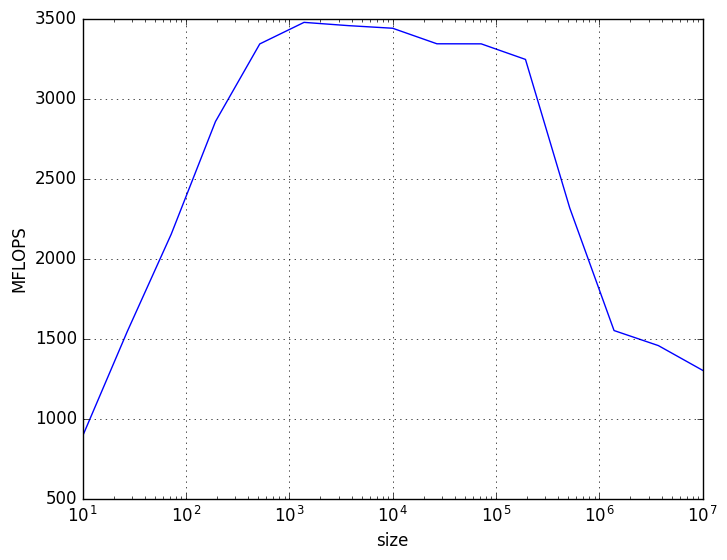

In [16]:
semilogx(sizes, mflops)
grid(true)
xlabel("size"); ylabel("MFLOPS");

In [17]:
function measure_blas(n)
    t = @benchmark blas_axpy!(a,x,y) setup=(x=rand($n); y=copy(x))
    mflops = 2*n / median(t).time * 1.e3
end;

In [18]:
blas_mflops = [measure_blas(n) for n in sizes];

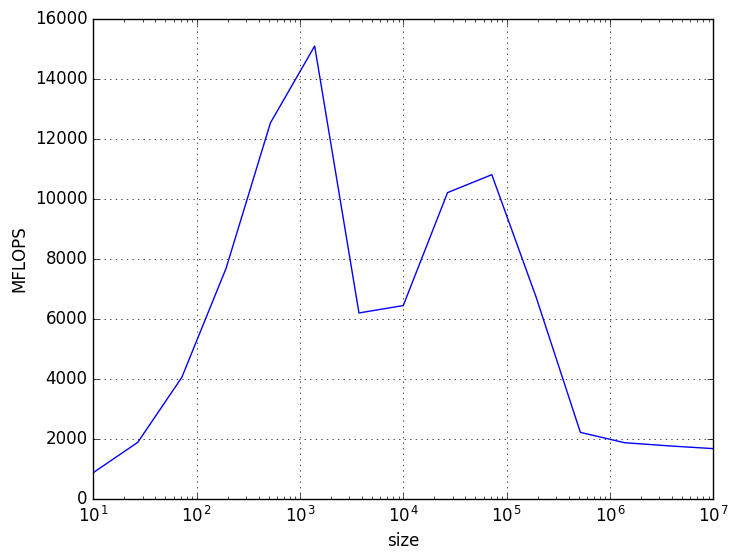

In [19]:
semilogx(sizes, blas_mflops)
grid(true)
xlabel("size"); ylabel("MFLOPS");